In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.8
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.8_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.8_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0146

Best Fitness:	700.4865
Solution:	700.0000
Diff:		0.4865

[0:10:14][----------] 1.96% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9636

Best Fitness:	700.4411
Solution:	700.0000
Diff:		0.4411

[0:19:33][----------] 3.92% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9184

Best Fitness:	700.4156
Solution:	700.0000
Diff:		0.4156

[0:28:51][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0054

Best Fitness:	700.6267
Solution:	700.0000
Diff:		0.6267

[0:38:24][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9605

Best Fitness:	700.5785
Solution:	700.0000
Diff:		0.5785

[0:46:36][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9193

Best Fitness:	700.5373
Solution:	700.0000
Diff:		0.5373

[0:54:46][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9745

Best Fitness:	700.5441
Solution:	700.0000
Diff:		0.5441

[1:02:58][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9740

Best Fitness:	700.6266
Solution:	700.0000
Diff:		0.6266

[1:11:13][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9643

Best Fitness:	700.4194
Solution:	700.0000
Diff:		0.4194

[1:19:25][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9222

Best Fitness:	700.4767
Solution:	700.0000
Diff:		0.4767

[1:27:26][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0255

Best Fitness:	700.6014
Solution:	700.0000
Diff:		0.6014

[1:35:32][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9522

Best Fitness:	700.2994
Solution:	700.0000
Diff:		0.2994

[1:42:44][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9858

Best Fitness:	700.6282
Solution:	700.0000
Diff:		0.6282

[1:50:03][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9765

Best Fitness:	700.6829
Solution:	700.0000
Diff:		0.6829

[1:56:57][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9214

Best Fitness:	700.5300
Solution:	700.0000
Diff:		0.5300

[2:04:14][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9477

Best Fitness:	700.3895
Solution:	700.0000
Diff:		0.3895

[2:11:28][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0035

Best Fitness:	700.6100
Solution:	700.0000
Diff:		0.6100

[2:18:21][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9230

Best Fitness:	700.5079
Solution:	700.0000
Diff:		0.5079

[2:25:06][####------] 35.29% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9843

Best Fitness:	700.5449
Solution:	700.0000
Diff:		0.5449

[2:31:16][####------] 37.25% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9272

Best Fitness:	700.5220
Solution:	700.0000
Diff:		0.5220

[2:37:26][####------] 39.22% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0267

Best Fitness:	700.7533
Solution:	700.0000
Diff:		0.7533

[2:43:39][####------] 41.18% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9455

Best Fitness:	700.5948
Solution:	700.0000
Diff:		0.5948

[2:49:55][####------] 43.14% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9422

Best Fitness:	700.4916
Solution:	700.0000
Diff:		0.4916

[2:56:15][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9807

Best Fitness:	700.6526
Solution:	700.0000
Diff:		0.6526

[3:02:16][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0661

Best Fitness:	700.5189
Solution:	700.0000
Diff:		0.5189

[3:08:13][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9793

Best Fitness:	700.5715
Solution:	700.0000
Diff:		0.5715

[3:13:37][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9568

Best Fitness:	700.4708
Solution:	700.0000
Diff:		0.4708

[3:18:54][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9299

Best Fitness:	700.4674
Solution:	700.0000
Diff:		0.4674

[3:24:12][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9710

Best Fitness:	700.5819
Solution:	700.0000
Diff:		0.5819

[3:29:29][######----] 56.86% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9527

Best Fitness:	700.4949
Solution:	700.0000
Diff:		0.4949

[3:34:40][######----] 58.82% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0096

Best Fitness:	700.5182
Solution:	700.0000
Diff:		0.5182

[3:39:57][######----] 60.78% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0992

Best Fitness:	700.7555
Solution:	700.0000
Diff:		0.7555

[3:44:42][######----] 62.75% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0084

Best Fitness:	700.5532
Solution:	700.0000
Diff:		0.5532

[3:49:09][######----] 64.71% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.1003

Best Fitness:	700.8101
Solution:	700.0000
Diff:		0.8101

[3:53:34][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9679

Best Fitness:	700.4051
Solution:	700.0000
Diff:		0.4051

[3:57:54][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9661

Best Fitness:	700.6045
Solution:	700.0000
Diff:		0.6045

[4:02:14][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0227

Best Fitness:	700.7125
Solution:	700.0000
Diff:		0.7125

[4:06:35][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9760

Best Fitness:	700.6454
Solution:	700.0000
Diff:		0.6454

[4:10:54][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9326

Best Fitness:	700.4356
Solution:	700.0000
Diff:		0.4356

[4:14:33][########--] 76.47% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9994

Best Fitness:	700.5503
Solution:	700.0000
Diff:		0.5503

[4:18:02][########--] 78.43% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.8963

Best Fitness:	700.3070
Solution:	700.0000
Diff:		0.3070

[4:21:32][########--] 80.39% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9910

Best Fitness:	700.6225
Solution:	700.0000
Diff:		0.6225

[4:25:00][########--] 82.35% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9544

Best Fitness:	700.5539
Solution:	700.0000
Diff:		0.5539

[4:28:29][########--] 84.31% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9247

Best Fitness:	700.5833
Solution:	700.0000
Diff:		0.5833

[4:32:08][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9908

Best Fitness:	700.6652
Solution:	700.0000
Diff:		0.6652

[4:35:30][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9890

Best Fitness:	700.6993
Solution:	700.0000
Diff:		0.6993

[4:38:28][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.8824

Best Fitness:	700.4083
Solution:	700.0000
Diff:		0.4083

[4:41:08][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9701

Best Fitness:	700.6349
Solution:	700.0000
Diff:		0.6349

[4:43:49][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0831

Best Fitness:	700.7887
Solution:	700.0000
Diff:		0.7887

[4:46:29][##########] 96.08% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	701.0243

Best Fitness:	700.7497
Solution:	700.0000
Diff:		0.7497

[4:49:08][##########] 98.04% 

Optimization ended due to max fitness evals (max = 80000.0, curr = 79800)


#Generations:	264

#FitnessEvals:	79800

Mean Fitness:	700.9330

Best Fitness:	700.4848
Solution:	700.0000
Diff:		0.4848

[4:51:56][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:51:56

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
259,0.89043,0.885098,1.031752,0.992159,1.008786,1.000263,1.020457,1.026133,1.027549,0.961145,...,0.985251,1.012842,0.923277,0.986855,0.78088,1.004617,0.823848,1.013732,0.991852,50
260,0.89043,0.885098,1.031752,0.992159,1.008786,0.939864,1.020457,1.026133,1.027549,0.961145,...,0.985251,1.012842,0.923277,0.986855,0.78088,1.004617,0.823848,1.013732,0.991852,50
261,0.89043,0.885098,1.031752,0.992159,1.008786,0.939864,1.020457,1.026133,1.027549,0.961145,...,0.985251,1.012842,0.923277,0.986855,0.78088,1.004617,0.823848,1.013732,0.991852,50
262,0.89043,0.885098,1.031752,0.992159,1.008786,0.939864,1.020457,1.026133,1.027549,0.961145,...,0.985251,1.012842,0.923277,0.986855,0.78088,1.004617,0.823848,1.013732,0.991852,50
263,0.89043,0.885098,1.031752,0.992159,1.008786,0.939864,1.020457,1.026133,1.027549,0.961145,...,0.985251,1.012842,0.923277,0.986855,0.78088,1.004617,0.823848,1.013732,0.991852,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.48654899261850915

Best error for run 1: 0.4411102063598946

Best error for run 2: 0.4155619897039742

Best error for run 3: 0.6267241835539608

Best error for run 4: 0.5784625781809609

Best error for run 5: 0.5372670107434487

Best error for run 6: 0.5440964791276883

Best error for run 7: 0.6266116977901675

Best error for run 8: 0.41936718751094304

Best error for run 9: 0.47673223709625745

Best error for run 10: 0.6014395834546349

Best error for run 11: 0.2994242666256923

Best error for run 12: 0.6282084051549646

Best error for run 13: 0.6829297128449525

Best error for run 14: 0.5299509578836705

Best error for run 15: 0.38954693155994846

Best error for run 16: 0.6099793498740382

Best error for run 17: 0.5079225199845041

Best error for run 18: 0.5449066200354764

Best error for run 19: 0.5220182207124253

Best error for run 20: 0.7533125302377357

Best error for run 21: 0.5947944284731648

Best error for run 22: 0.4915947234823079

Best error for run 23: 0.6525981546861885

Best error for run 24: 0.5189090689273144

Best error for run 25: 0.571516559308975

Best error for run 26: 0.47084737492309614

Best error for run 27: 0.46743397872626247

Best error for run 28: 0.5818573356639263

Best error for run 29: 0.49491340079123347

Best error for run 30: 0.5182156319316391

Best error for run 31: 0.7555298420755889

Best error for run 32: 0.5532456335844245

Best error for run 33: 0.8101394544456753

Best error for run 34: 0.4050694261186436

Best error for run 35: 0.6044780436908468

Best error for run 36: 0.7124673845103189

Best error for run 37: 0.6454439941358032

Best error for run 38: 0.4355640141392314

Best error for run 39: 0.5503463133626383

Best error for run 40: 0.3069874436985174

Best error for run 41: 0.6224831836012754

Best error for run 42: 0.553891527310725

Best error for run 43: 0.5833018615429637

Best error for run 44: 0.6651728281656233

Best error for run 45: 0.6992806417708834

Best error for run 46: 0.4082639939791761

Best error for run 47: 0.6348800231924088

Best error for run 48: 0.788689084951443

Best error for run 49: 0.7496714956815822

Best error for run 50: 0.4847579122528032

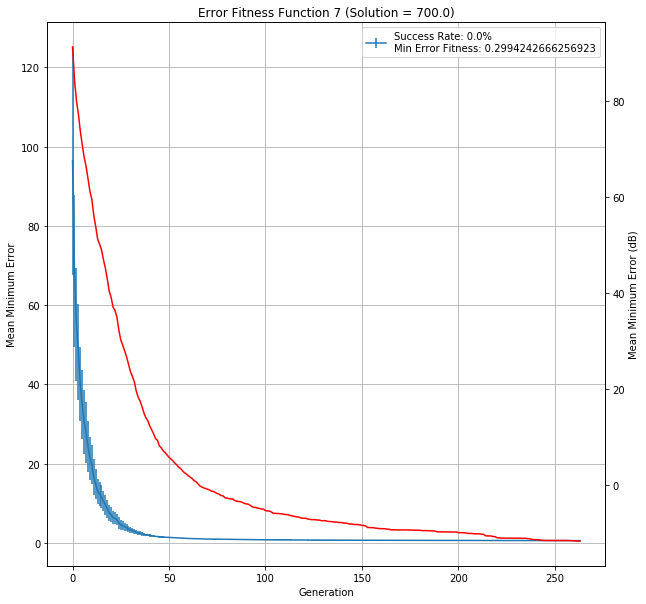

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.8_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.8,0.486549,0.44111,0.415562,0.626724,0.578463,0.537267,...,0.665173,0.699281,0.408264,0.63488,0.788689,0.749671,0.484758,0.559891,4:51:56,79800
